# Lluvia en Australia 
#### Pablo Lario Gómez & Diego Miguel García

In [568]:
import numpy as np
import pandas as pd

from sklearn import tree
from sklearn.metrics import accuracy_score, roc_auc_score
from sklearn.preprocessing import LabelEncoder

import graphviz 
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns

## Ignorando las variables categóricas

In [569]:
df_rain = pd.read_csv('weatherAUS.csv')

In [570]:
df_rain.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [571]:
df_rain[df_rain.columns]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


Para poder ignorar las variables categóricas, necesitamos especificarle los índices y llamar a iloc para poder mostrar los datos de estas variables.

In [572]:
features = df_rain.columns

indices = [2, 3, 4, 8, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]

df_rain.iloc[0:145460, indices]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.9,0.6,44.0,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8
1,7.4,25.1,0.0,44.0,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3
2,12.9,25.7,0.0,46.0,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2
3,9.2,28.0,0.0,24.0,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5
4,17.5,32.3,1.0,41.0,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.4,0.0,31.0,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4
145456,3.6,25.3,0.0,22.0,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5
145457,5.4,26.9,0.0,37.0,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1
145458,7.8,27.0,0.0,28.0,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0


Antes de poder calcular el árbol, necesitamos tratar de alguna forma los datos que estén como `NaN`, ya que el árbol no podrá calcularse si hay estos valores. Para solucionar este problema, voy a calcular para cada columna que vamos a usar la media y asignar este valor a todos aquellos valores `NaN`, y esto lo haré para todas las columnas.

In [573]:
df_rain['MinTemp'] = df_rain['MinTemp'].fillna(df_rain['MinTemp'].mean())
df_rain['MaxTemp'] = df_rain['MaxTemp'].fillna(df_rain['MaxTemp'].mean())
df_rain['Rainfall'] = df_rain['Rainfall'].fillna(df_rain['Rainfall'].mean())
df_rain['WindGustSpeed'] = df_rain['WindGustSpeed'].fillna(df_rain['WindGustSpeed'].mean())
df_rain['WindSpeed9am'] = df_rain['WindSpeed9am'].fillna(df_rain['WindSpeed9am'].mean())
df_rain['WindSpeed3pm'] = df_rain['WindSpeed3pm'].fillna(df_rain['WindSpeed3pm'].mean())
df_rain['Humidity9am'] = df_rain['Humidity9am'].fillna(df_rain['Humidity9am'].mean())
df_rain['Humidity3pm'] = df_rain['Humidity3pm'].fillna(df_rain['Humidity3pm'].mean())
df_rain['Pressure9am'] = df_rain['Pressure9am'].fillna(df_rain['Pressure9am'].mean())
df_rain['Pressure3pm'] = df_rain['Pressure3pm'].fillna(df_rain['Pressure3pm'].mean())
df_rain['Cloud9am'] = df_rain['Cloud9am'].fillna(df_rain['Cloud9am'].mean())
df_rain['Cloud3pm'] = df_rain['Cloud3pm'].fillna(df_rain['Cloud3pm'].mean())
df_rain['Temp9am'] = df_rain['Temp9am'].fillna(df_rain['Temp9am'].mean())
df_rain['Temp3pm'] = df_rain['Temp3pm'].fillna(df_rain['Temp3pm'].mean())

En el caso de `RainTomorrow`, al ser una variable categórica, rellenaremos los valores `NaN` con la moda, en vez de con la media.

In [574]:
df_rain['RainTomorrow'] = df_rain['RainTomorrow'].fillna(df_rain['RainTomorrow'].mode())

Además, en este caso nuestra variable objectivo a predecir va a ser `RainTomorrow`. Por lo que tendremos que encodearla para que se vuelva una variable `Binaria` en vez de `Categórica`. Esto lo podemos lograr con un `LabelEncoder`.

In [575]:
encoder = LabelEncoder()

df_rain['RainTomorrow'] = encoder.fit_transform(df_rain['RainTomorrow'])

Para comprobar volvemos a mirar los datos de la tabla.

In [576]:
indices2 = indices.copy()
indices2.append(22)
df_rain.iloc[0:145460, indices2]

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainTomorrow
0,13.4,22.900000,0.6,44.00000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,7.4,25.100000,0.0,44.00000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,12.9,25.700000,0.0,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,9.2,28.000000,0.0,24.00000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,17.5,32.300000,1.0,41.00000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0
145456,3.6,25.300000,0.0,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0
145457,5.4,26.900000,0.0,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0
145458,7.8,27.000000,0.0,28.00000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0


Una vez sabemos que estas son las variables que queremos usar para el árbol, calculamos las variables predictoras por su nombre, no por su índice. También especificamos cuál va a ser la variable objetivo, que en este caso va a ser `RainTomorrow`.

In [577]:
attributes = features[indices] # Variables predictoras
target = features[-1]          # Variable objetivo = RainTomorrow

In [578]:
X = df_rain[attributes] 
X

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
0,13.4,22.900000,0.6,44.00000,20.0,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8
1,7.4,25.100000,0.0,44.00000,4.0,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3
2,12.9,25.700000,0.0,46.00000,19.0,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2
3,9.2,28.000000,0.0,24.00000,11.0,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5
4,17.5,32.300000,1.0,41.00000,7.0,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2.8,23.400000,0.0,31.00000,13.0,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4
145456,3.6,25.300000,0.0,22.00000,13.0,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5
145457,5.4,26.900000,0.0,37.00000,9.0,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1
145458,7.8,27.000000,0.0,28.00000,13.0,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0


In [579]:
y = df_rain[target] 
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    2
Name: RainTomorrow, Length: 145460, dtype: int32

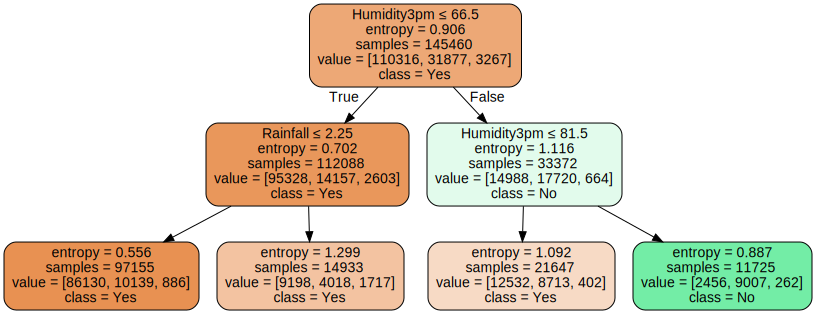

In [580]:
max_depth = 2
min_samples_leaf = 1

arbol = tree.DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=max_depth, 
                                    min_samples_leaf = min_samples_leaf)

arbol.fit(X, y)

dot_data = tree.export_graphviz(arbol, out_file=None, 
                         feature_names=attributes,  
                         class_names=['Yes', 'No'],  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)
graph

In [581]:
arbol.score(X, y)

0.8034304963563866

## Sin ignorar las variables categóricas

Vamos ahora a realizar otra vez el árbol pero esta vez teniendo en cuenta todas las variables categóricas. De esta forma veremos si estas tienen influencia a la hora de crear el árbol de decisión.

In [582]:
df_rain = pd.read_csv('weatherAUS.csv')

In [583]:
df_rain[df_rain.columns]

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,...,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,...,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,...,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,...,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,...,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,...,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,...,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,...,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,...,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No


In [584]:
df_rain['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [585]:
# Variables numéricas
df_rain['MinTemp'] = df_rain['MinTemp'].fillna(df_rain['MinTemp'].mean())
df_rain['MaxTemp'] = df_rain['MaxTemp'].fillna(df_rain['MaxTemp'].mean())
df_rain['Rainfall'] = df_rain['Rainfall'].fillna(df_rain['Rainfall'].mean())
df_rain['WindGustSpeed'] = df_rain['WindGustSpeed'].fillna(df_rain['WindGustSpeed'].mean())
df_rain['WindSpeed9am'] = df_rain['WindSpeed9am'].fillna(df_rain['WindSpeed9am'].mean())
df_rain['WindSpeed3pm'] = df_rain['WindSpeed3pm'].fillna(df_rain['WindSpeed3pm'].mean())
df_rain['Humidity9am'] = df_rain['Humidity9am'].fillna(df_rain['Humidity9am'].mean())
df_rain['Humidity3pm'] = df_rain['Humidity3pm'].fillna(df_rain['Humidity3pm'].mean())
df_rain['Pressure9am'] = df_rain['Pressure9am'].fillna(df_rain['Pressure9am'].mean())
df_rain['Pressure3pm'] = df_rain['Pressure3pm'].fillna(df_rain['Pressure3pm'].mean())
df_rain['Cloud9am'] = df_rain['Cloud9am'].fillna(df_rain['Cloud9am'].mean())
df_rain['Cloud3pm'] = df_rain['Cloud3pm'].fillna(df_rain['Cloud3pm'].mean())
df_rain['Temp9am'] = df_rain['Temp9am'].fillna(df_rain['Temp9am'].mean())
df_rain['Temp3pm'] = df_rain['Temp3pm'].fillna(df_rain['Temp3pm'].mean())

# Variables categóricas
df_rain['Location'] = df_rain['Location'].fillna(df_rain['Location'].mode())
df_rain['Evaporation'] = df_rain['Evaporation'].fillna(df_rain['Evaporation'].mode())
df_rain['Sunshine'] = df_rain['Sunshine'].fillna(df_rain['Sunshine'].mode())
df_rain['WindGustDir'] = df_rain['WindGustDir'].fillna(df_rain['WindGustDir'].mode())
df_rain['WindDir9am'] = df_rain['WindDir9am'].fillna(df_rain['WindDir9am'].mode())
df_rain['WindDir3pm'] = df_rain['WindDir3pm'].fillna(df_rain['WindDir3pm'].mode())
df_rain['RainToday'] = df_rain['RainToday'].fillna(df_rain['RainToday'].mode())
df_rain['RainTomorrow'] = df_rain['RainTomorrow'].fillna(df_rain['RainTomorrow'].mode())

In [586]:
df_rain['RainTomorrow'].value_counts()

No     110316
Yes     31877
Name: RainTomorrow, dtype: int64

In [587]:
encoder = LabelEncoder()

df_rain['Location'] = encoder.fit_transform(df_rain['Location'])
df_rain['Evaporation'] = encoder.fit_transform(df_rain['Evaporation'])
df_rain['Sunshine'] = encoder.fit_transform(df_rain['Sunshine'])
df_rain['WindGustDir'] = encoder.fit_transform(df_rain['WindGustDir'])
df_rain['WindDir9am'] = encoder.fit_transform(df_rain['WindDir9am'])
df_rain['WindDir3pm'] = encoder.fit_transform(df_rain['WindDir3pm'])
df_rain['RainToday'] = encoder.fit_transform(df_rain['RainToday'])
df_rain['RainTomorrow'] = encoder.fit_transform(df_rain['RainTomorrow'])

In [588]:
df_rain['RainTomorrow'].value_counts()

0    110316
1     31877
2      3267
Name: RainTomorrow, dtype: int64

In [589]:
indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21]
features = df_rain.columns
attributes = features[indices]
target = features[-1]

In [590]:
X = df_rain[attributes] 
X

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,...,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
0,2,13.4,22.900000,0.6,40,0,13,44.00000,13,14,...,24.0,71.0,22.0,1007.7,1007.1,8.000000,4.50993,16.9,21.8,0
1,2,7.4,25.100000,0.0,358,145,14,44.00000,6,15,...,22.0,44.0,25.0,1010.6,1007.8,4.447461,4.50993,17.2,24.3,0
2,2,12.9,25.700000,0.0,358,145,15,46.00000,13,15,...,26.0,38.0,30.0,1007.6,1008.7,4.447461,2.00000,21.0,23.2,0
3,2,9.2,28.000000,0.0,358,145,4,24.00000,9,0,...,9.0,45.0,16.0,1017.6,1012.8,4.447461,4.50993,18.1,26.5,0
4,2,17.5,32.300000,1.0,358,145,13,41.00000,1,7,...,20.0,82.0,33.0,1010.8,1006.0,7.000000,8.00000,17.8,29.7,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145455,41,2.8,23.400000,0.0,358,145,0,31.00000,9,1,...,11.0,51.0,24.0,1024.6,1020.3,4.447461,4.50993,10.1,22.4,0
145456,41,3.6,25.300000,0.0,358,145,6,22.00000,9,3,...,9.0,56.0,21.0,1023.5,1019.1,4.447461,4.50993,10.9,24.5,0
145457,41,5.4,26.900000,0.0,358,145,3,37.00000,9,14,...,9.0,53.0,24.0,1021.0,1016.8,4.447461,4.50993,12.5,26.1,0
145458,41,7.8,27.000000,0.0,358,145,9,28.00000,10,3,...,7.0,51.0,24.0,1019.4,1016.5,3.000000,2.00000,15.1,26.0,0


In [591]:
y = df_rain[target] 
y

0         0
1         0
2         0
3         0
4         0
         ..
145455    0
145456    0
145457    0
145458    0
145459    2
Name: RainTomorrow, Length: 145460, dtype: int32

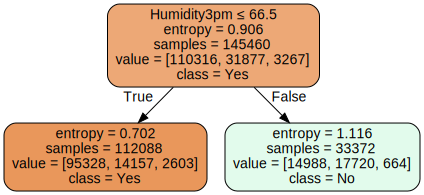

In [592]:
max_depth = 1
min_samples_leaf = 1

arbol = tree.DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=max_depth, 
                                    min_samples_leaf = min_samples_leaf)

arbol.fit(X, y)

dot_data = tree.export_graphviz(arbol, out_file=None, 
                         feature_names=attributes,  
                         class_names=['Yes', 'No'],  
                         filled=True, rounded=True,  
                         special_characters=True)  

graph = graphviz.Source(dot_data)
graph

In [593]:
arbol.score(X, y)

0.7771758559054035

Podemos ver como en este caso no podemos usar una profundidad mayor que 1 porque el árbol deja de funcionar y no se puede exportar el árbol. Aún así, podemos calcular el árbol aunque no podamos visualizarlo.

In [594]:
max_depth = 2
min_samples_leaf = 1

arbol = tree.DecisionTreeClassifier(criterion='entropy', 
                                    max_depth=max_depth, 
                                    min_samples_leaf = min_samples_leaf)

arbol.fit(X, y)

arbol.score(X, y)

0.8097827581465695

## Algunos Gráficos Interesantes

#### Veamos ahora algunos gráficos interesantes motivados por el árbol.

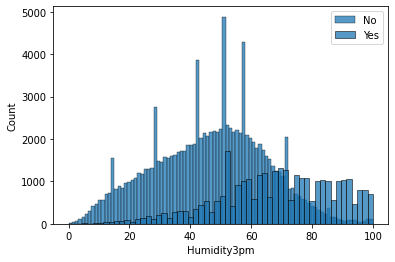

In [595]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "Humidity3pm"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "Humidity3pm"])
plt.legend(["No", "Yes"])

C:\Users\49427234\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\49427234\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


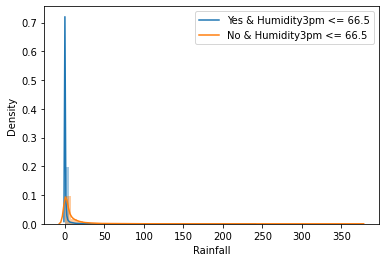

In [596]:
sns.distplot(df_rain.loc[(df_rain["RainTomorrow"] == 0.0) & (df_rain["Humidity3pm"] <= 66.5), "Rainfall"])
sns.distplot(df_rain.loc[(df_rain["RainTomorrow"] == 1.0) & (df_rain["Humidity3pm"] > 66.5), "Rainfall"])
plt.legend(["Yes & Humidity3pm <= 66.5", "No & Humidity3pm <= 66.5"])

C:\Users\49427234\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\49427234\AppData\Local\Programs\Python\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


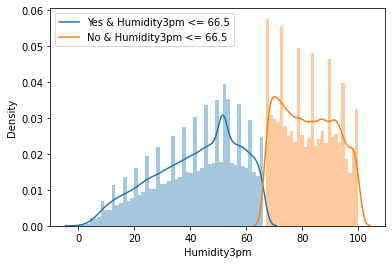

In [597]:
sns.distplot(df_rain.loc[(df_rain["RainTomorrow"] == 0.0) & (df_rain["Humidity3pm"] <= 66.5), "Humidity3pm"])
sns.distplot(df_rain.loc[(df_rain["RainTomorrow"] == 1.0) & (df_rain["Humidity3pm"] > 66.5), "Humidity3pm"])
plt.legend(["Yes & Humidity3pm <= 66.5", "No & Humidity3pm <= 66.5"])

#### Otras gráficas interesantes pero que no están motivadas por el árbol

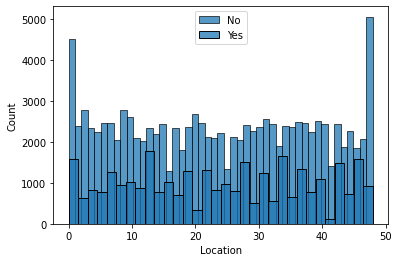

In [598]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "Location"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "Location"])
plt.legend(["No", "Yes"])

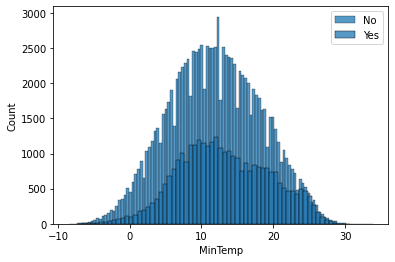

In [599]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "MinTemp"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "MinTemp"])
plt.legend(["No", "Yes"])

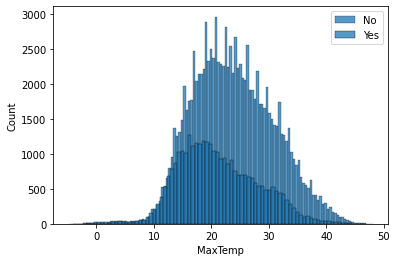

In [600]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "MaxTemp"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "MaxTemp"])
plt.legend(["No", "Yes"])

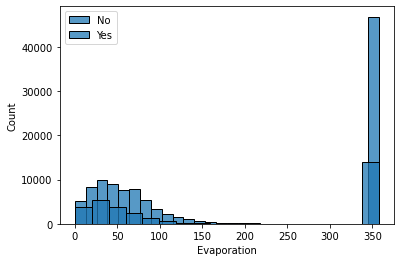

In [601]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "Evaporation"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "Evaporation"])
plt.legend(["No", "Yes"])

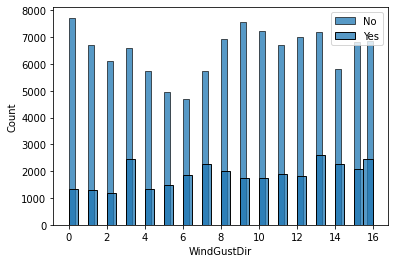

In [602]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "WindGustDir"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "WindGustDir"])
plt.legend(["No", "Yes"])

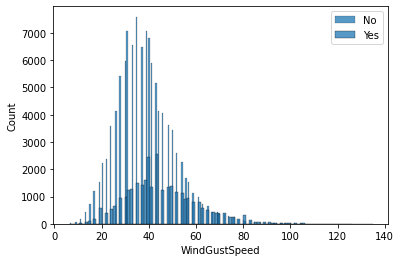

In [603]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "WindGustSpeed"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "WindGustSpeed"])
plt.legend(["No", "Yes"])

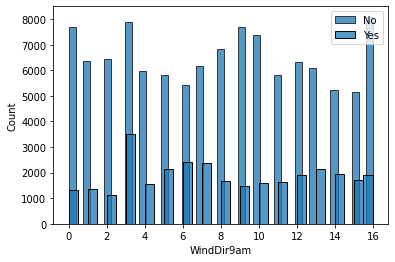

In [604]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "WindDir9am"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "WindDir9am"])
plt.legend(["No", "Yes"])

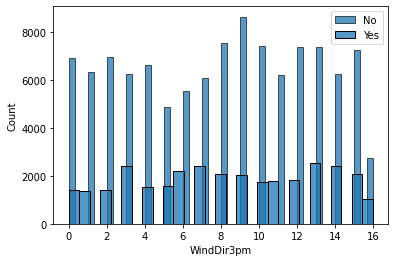

In [605]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "WindDir3pm"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "WindDir3pm"])
plt.legend(["No", "Yes"])

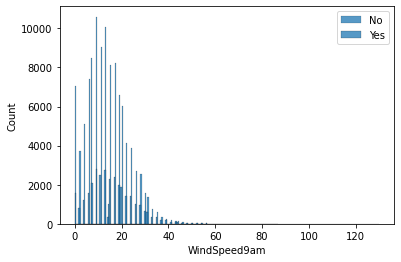

In [606]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "WindSpeed9am"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "WindSpeed9am"])
plt.legend(["No", "Yes"])

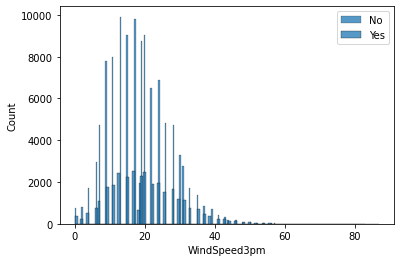

In [607]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "WindSpeed3pm"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "WindSpeed3pm"])
plt.legend(["No", "Yes"])

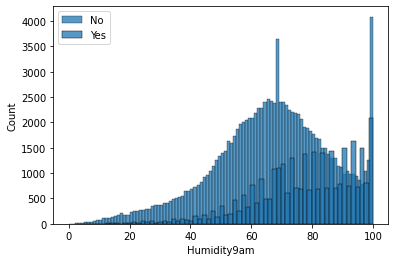

In [608]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "Humidity9am"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "Humidity9am"])
plt.legend(["No", "Yes"])

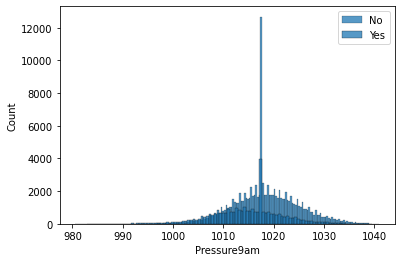

In [609]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "Pressure9am"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "Pressure9am"])
plt.legend(["No", "Yes"])

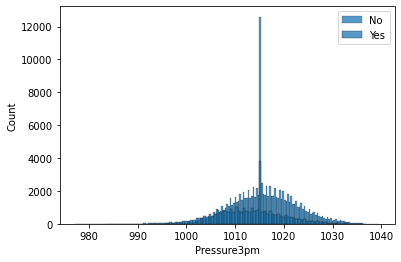

In [610]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "Pressure3pm"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "Pressure3pm"])
plt.legend(["No", "Yes"])

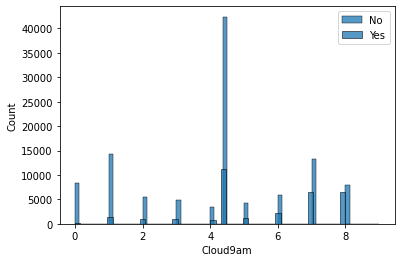

In [611]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "Cloud9am"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "Cloud9am"])
plt.legend(["No", "Yes"])

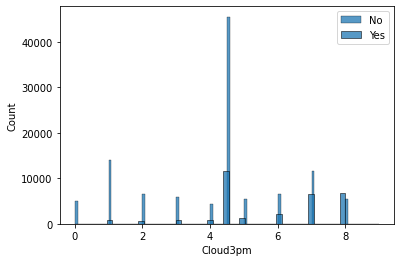

In [612]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "Cloud3pm"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "Cloud3pm"])
plt.legend(["No", "Yes"])

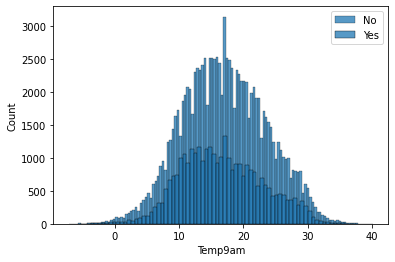

In [613]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "Temp9am"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "Temp9am"])
plt.legend(["No", "Yes"])

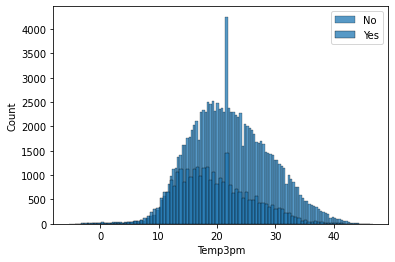

In [614]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "Temp3pm"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "Temp3pm"])
plt.legend(["No", "Yes"])

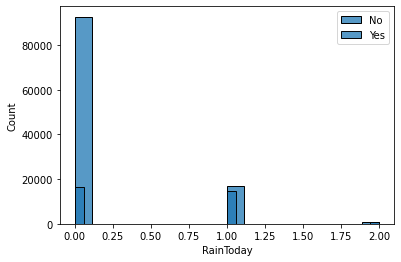

In [615]:
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 0, "RainToday"])
sns.histplot(df_rain.loc[df_rain["RainTomorrow"] == 1, "RainToday"])
plt.legend(["No", "Yes"])